In [1]:

import yfinance as yf
import requests
from tickers500 import tickers500
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tickerTA import Ticker
from tickerTA import TechnicalAnalysis
from tradingStrategy1 import TradingStrategy1
from positions import Positions

# This is to avoid the SettingWithCopyWarning in pandas
pd.options.mode.copy_on_write = True 

In [2]:
def add_z_score(data: pd.DataFrame, frame: str = 'Adj Close', window1 = 20) -> pd.DataFrame:
    data['Z Score ' + frame] = (data[frame] - data[frame].rolling(window= window1).mean()) / data[frame].rolling(window= window1).std()
    data.dropna(inplace=True)
    return data

def get_z_score(data: pd.DataFrame, frame: str = 'Adj Close', window1 = 20) -> pd.DataFrame:
    data['Z Score ' + frame] = (data[frame] - data[frame].rolling(window= window1).mean()) / data[frame].rolling(window= window1).std()
    data.dropna(inplace=True)
    return data['Z Score ' + frame]

def plot_total_cum_profit(self, start='2022-01-31', end='2024-01-31'):
    self['Total Cum Profit %'] = self['Profit %'].cumsum()
    self.reset_index(inplace=True)
    self.index = pd.to_datetime(self['Buy Date'])
    plt.figure(figsize=(20, 10))
    plt.plot(self['Buy Date'], self['Total Cum Profit %'], drawstyle="steps-post", label='Total Cumulative Profit', alpha=1)

    spy_df = yf.download('SPY', start, end, progress=False)
    spy_df['Control'] = spy_df['Close'] - spy_df['Open']
    spy_df['Control %'] = (spy_df['Control'] / spy_df['Open']) * 100
    spy_df['Control Cumulative %'] = spy_df['Control %'].cumsum()
    plt.plot(spy_df['Control Cumulative %'], drawstyle="steps-post", label='SPY', alpha=0.8)

    plt.title('Total Cumulative Profit % vs SPY')
    plt.legend(loc='upper left')
    plt.savefig('tradingStrategy1/total_cum_profit.png')
    # plt.show()

    plt.close()

In [3]:

if __name__ == '__main__':
    # stock_df = pd.DataFrame()
    tradingstrategy1_df = pd.DataFrame()
    all_signals_df = pd.DataFrame()


    for ticker in tickers500:
        stock = Ticker(ticker, start='2022-01-31', end='2024-01-31')
        # stock_df = stock_df._append(stock.df)
        techA = TechnicalAnalysis(stock)
        tradingS = TradingStrategy1(techA)
        all_signals_df = all_signals_df._append(tradingS.all_signals_df)
        tradingstrategy1_df = tradingstrategy1_df._append(tradingS.trades_df)

    plot_total_cum_profit(tradingstrategy1_df)
    # print(tradingstrategy1_df['Total Cum Profit %'])

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FOX?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=FOX&crumb=dhI8XUMVh5p
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NWS?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=NWS&crumb=dhI8XUMVh5p
c:\Users\chris\Documents\Unreal Projects\AlgorithmicTrading\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:1057: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\chris\Documents\Unreal Projects\AlgorithmicTrading\.venv\Lib\site-packages\pandas\core\dtypes\cast.py:1081: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


In [4]:
all_signals_df = all_signals_df.sort_values(by='Date')
all_signals_df

,Ticker,Buy/Sell,Date,Price
0,LOW,Buy,2022-03-28 00:00:00,211.38
0,SMCI,Buy,2022-03-31 00:00:00,39.56
0,PHM,Buy,2022-04-01 00:00:00,42.62
0,HD,Buy,2022-04-01 00:00:00,300.5
0,C,Buy,2022-04-01 00:00:00,53.47
...,...,...,...,...
14,INTC,Buy,2024-01-29 00:00:00,43.71
9,CEG,Sell,2024-01-29 00:00:00,121.09
11,COF,Sell,2024-01-29 00:00:00,139.64
9,PSX,Sell,2024-01-29 00:00:00,139.66


In [5]:
positions = Positions(150000)

for _, row in all_signals_df.iterrows():
    if row['Buy/Sell'] == 'Buy':
        posn_size = positions.cash * 0.01
        shares = posn_size / row['Price']
        shares = shares.__round__(0)
        if shares > 0:
            positions.buy(row['Ticker'], row['Date'], row['Price'], shares)
        else:
            # print(f'Not enough money to buy {row["Ticker"]} on {row["Date"]}')
            pass
    else:
        positions.sell(row['Ticker'], row['Date'], row['Price'])


positions.cancel_open_positions()
positions.calculate_metrics()
positions.get_metrics()


AttributeError: 'Position' object has no attribute 'calculate_profit'

In [ ]:
print(positions.get_open_positions())

[]


In [ ]:
positions.capital

148163.4699999998

In [ ]:

positions.cancel_open_positions()
print(positions.get_open_positions())



[]


In [ ]:
positions.capital

148163.4699999998

In [ ]:

positions.trade_history_df.to_csv('CSV/TradingStrategy1/Positions/tradingstrategy1trades.csv')
positions.trade_history_df

,symbol,buy_date,buy_price,sell_date,sell_price,shares,profit,profit_percent
0,SMCI,2022-03-31,39.56,2022-05-05,56.65,1100.0,18799.00,43.200202
1,LOW,2022-03-28,211.38,2022-07-21,191.24,206.0,-4148.84,-9.527865
2,UBER,2022-05-05,27.87,2022-07-21,24.02,1561.0,-6009.85,-13.814137
3,ALL,2022-07-22,116.12,2022-08-12,127.66,375.0,4327.50,9.937995
4,PHM,2022-04-01,42.62,2022-11-11,43.82,1021.0,1225.20,2.815580
5,VZ,2022-07-21,47.63,2022-11-11,38.55,913.0,-8290.04,-19.063615
6,CTLT,2022-08-22,104.00,2022-12-01,50.44,418.0,-22388.08,-51.500000
7,HSY,2022-11-14,220.26,2023-02-03,235.16,197.0,2935.30,6.764733
8,CVX,2023-02-03,169.86,2023-04-04,171.14,256.0,327.68,0.753562
9,TT,2023-04-05,172.71,2023-05-02,187.42,252.0,3706.92,8.517168


<Axes: >

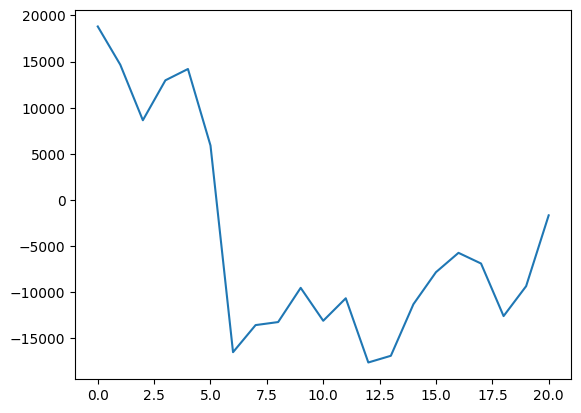

In [ ]:
positions.trade_history_df['profit'].cumsum().plot()

<Axes: >

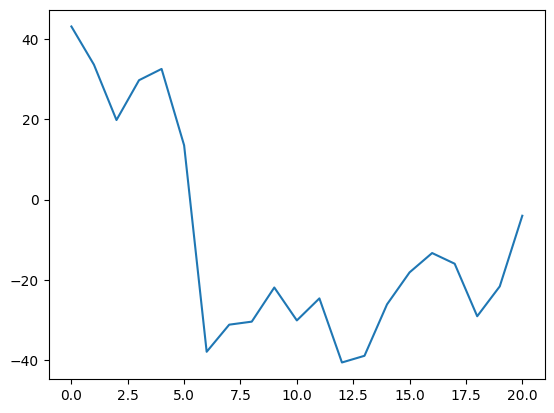

In [ ]:
positions.trade_history_df['profit_percent'].cumsum().plot()

In [ ]:
print('Total Profit: $', positions.total_profit.__round__(2))

Total Profit: $ -1660.85


In [ ]:
print('Capital: $', positions.capital.__round__(2))

Capital: $ 148163.47


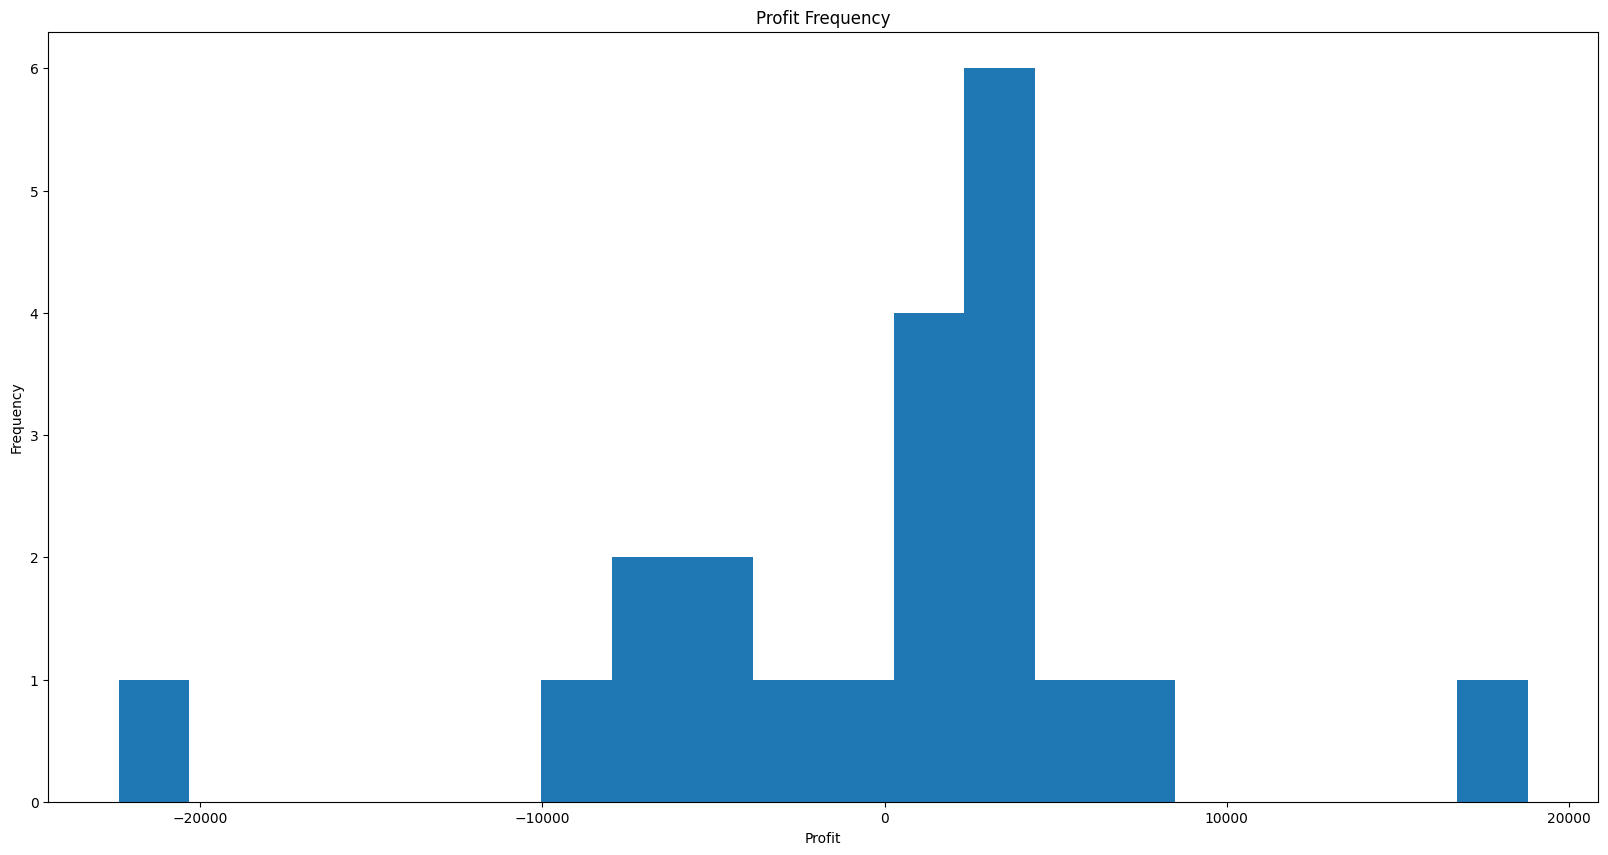

In [ ]:
positions.plot_profit_frequency()

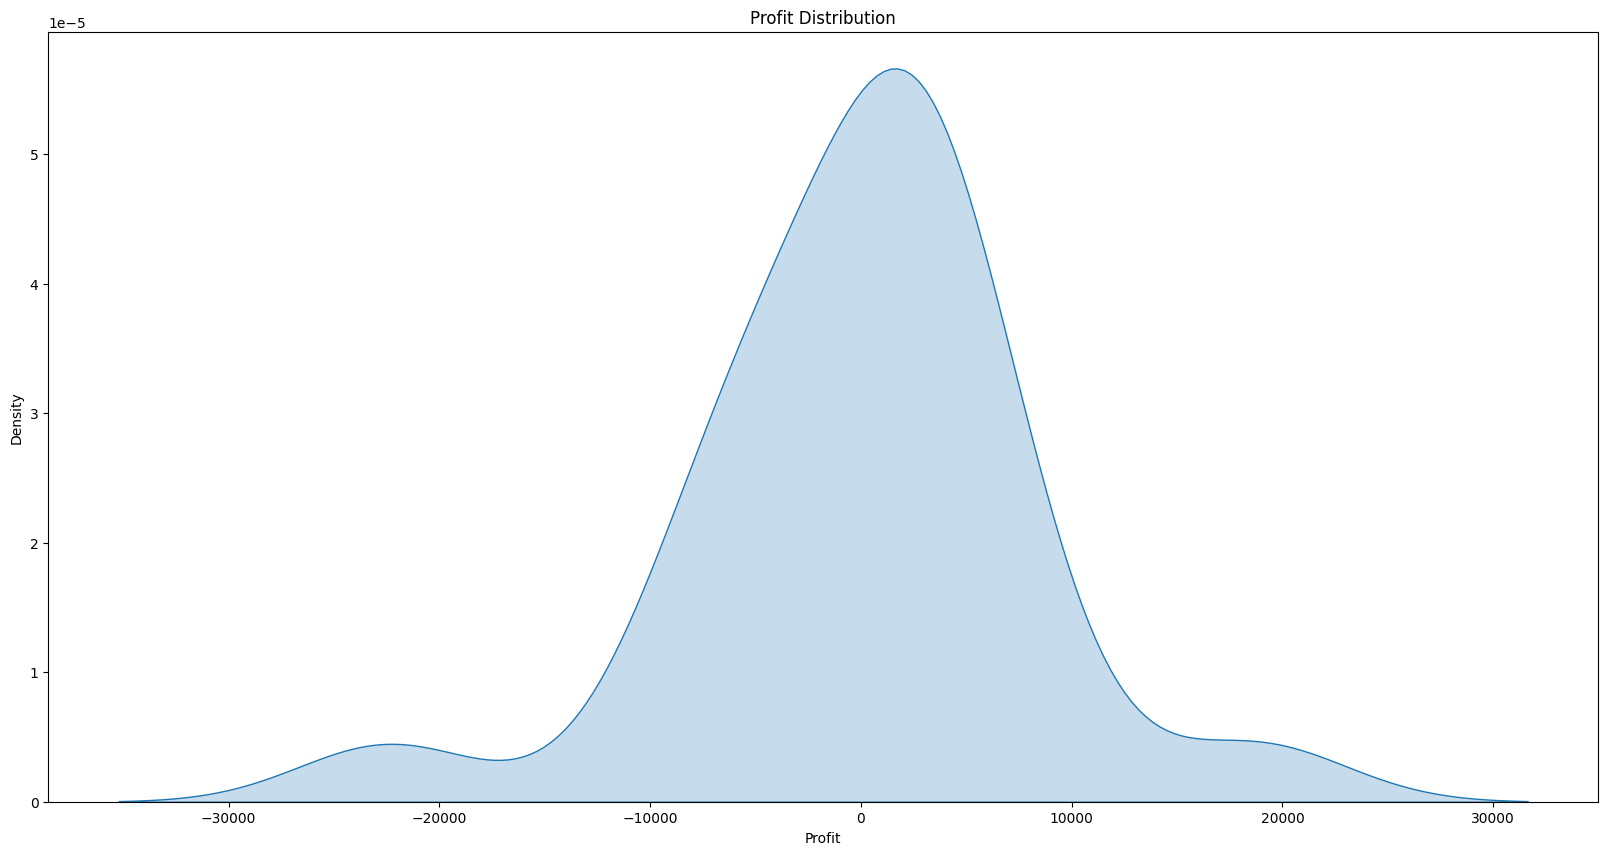

In [ ]:
positions.plot_profit_distribution()

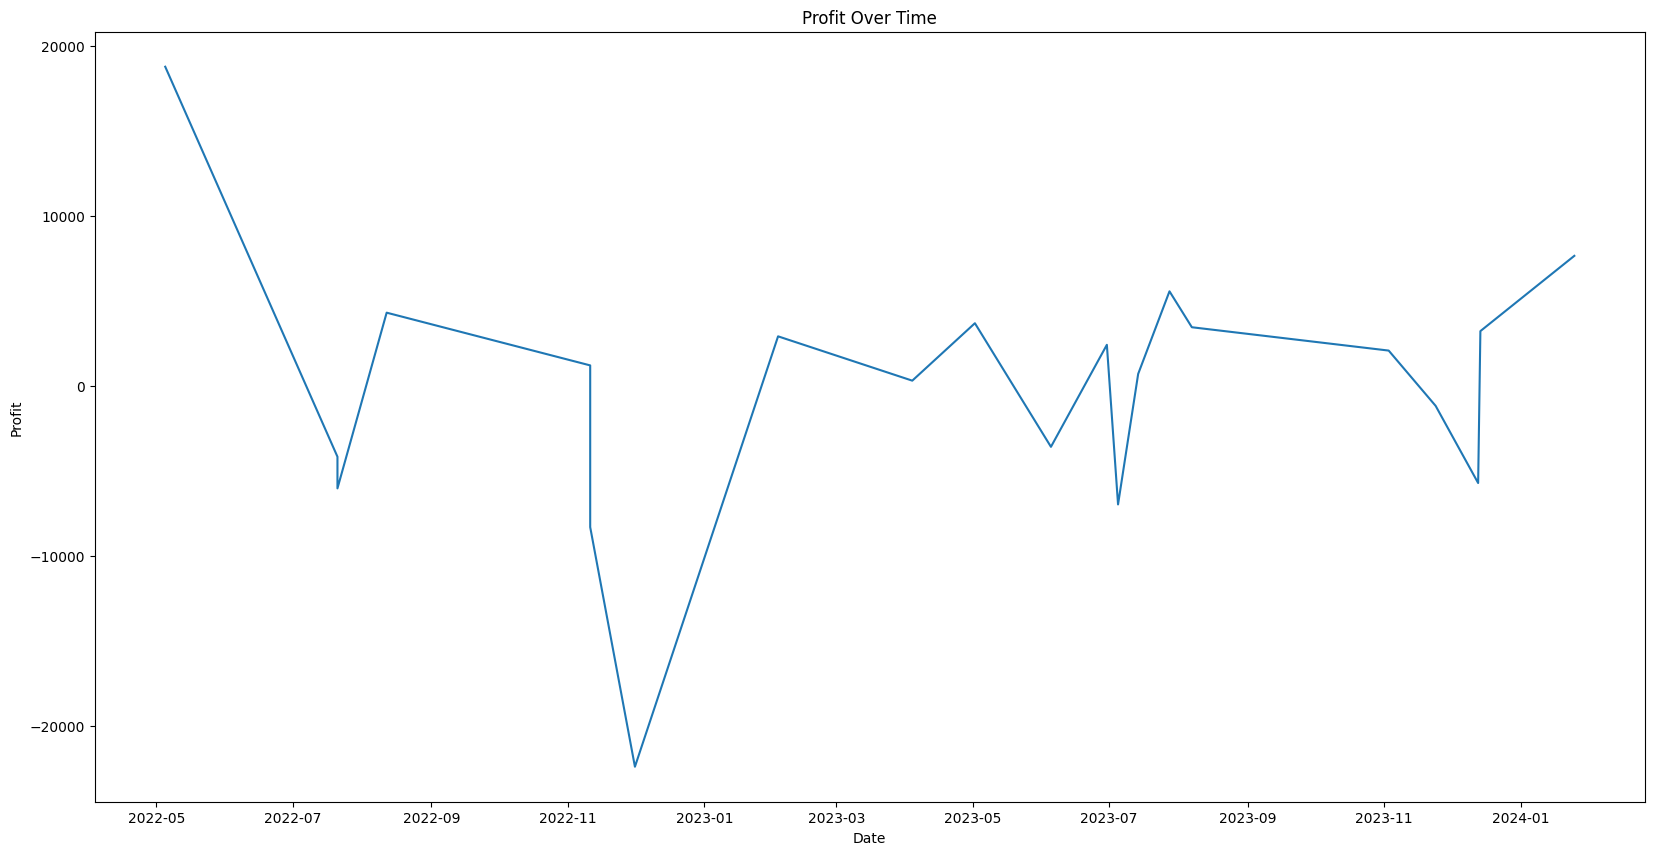

In [ ]:
positions.plot_profit_time()

In [ ]:
print('Total Profit : ', ((positions.capital - positions.starting_capital) / positions.starting_capital * 100).__round__(2), '%')

Total Profit :  -1.22 %


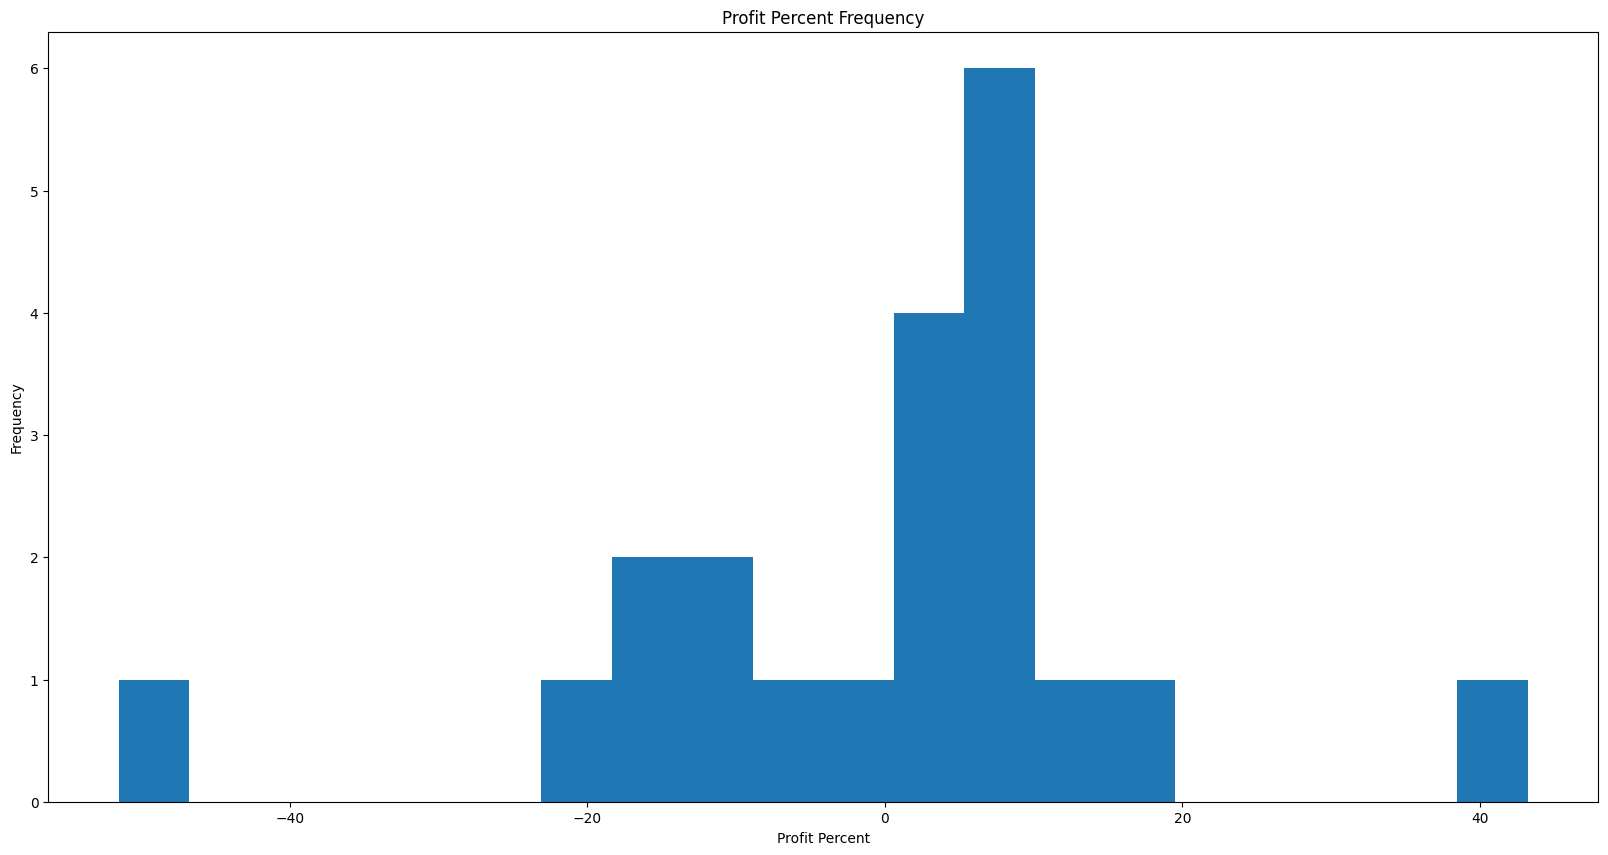

In [ ]:
positions.plot_profit_percent_frequency()

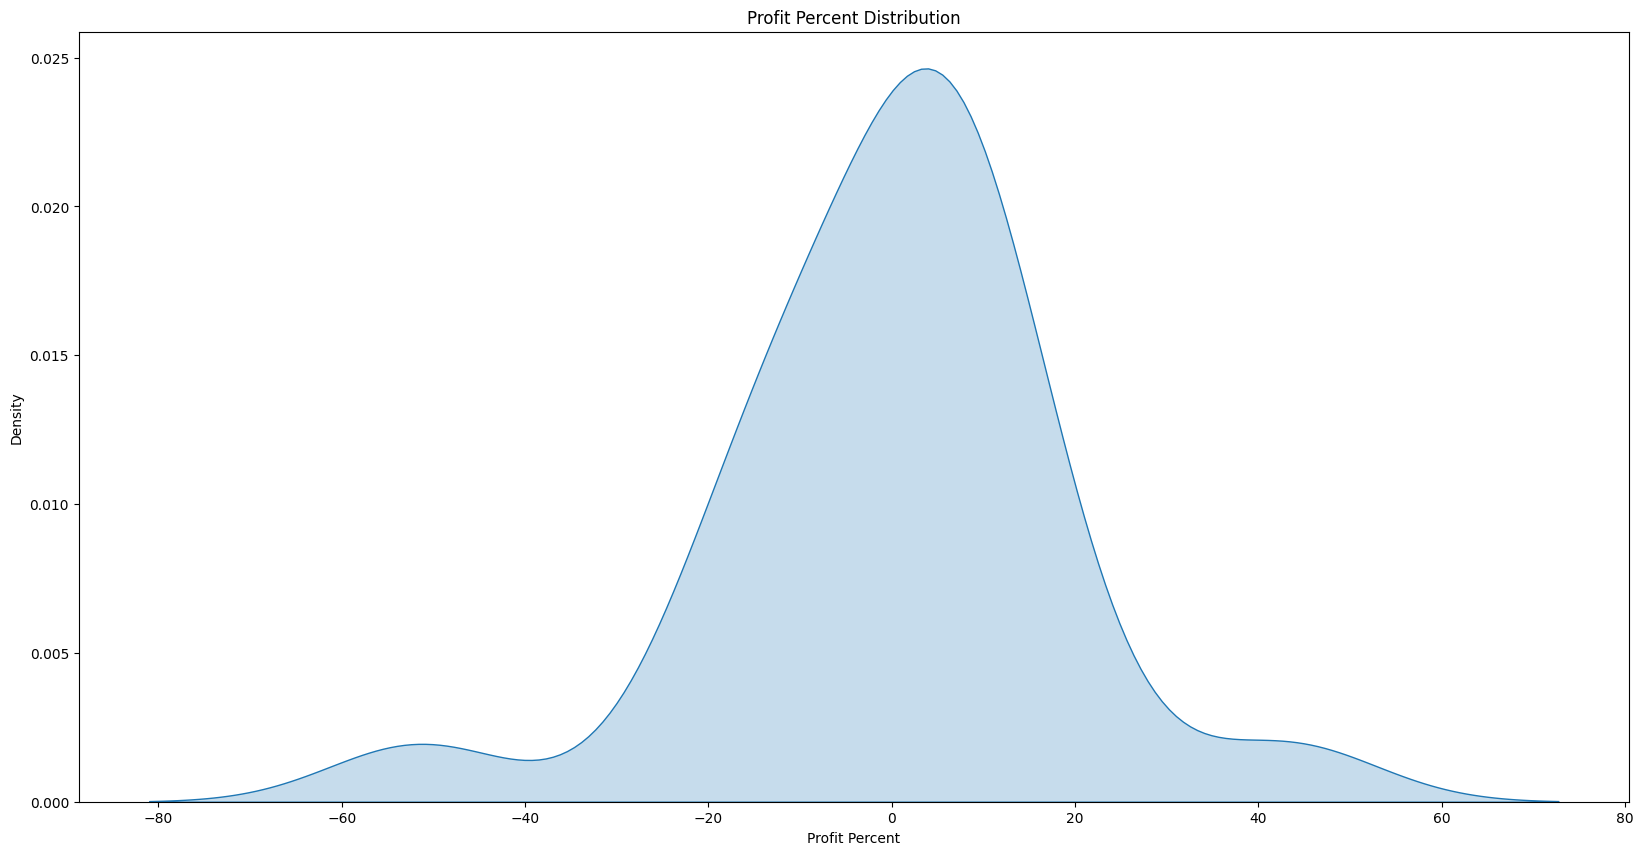

In [ ]:
positions.plot_profit_percent_distribution()

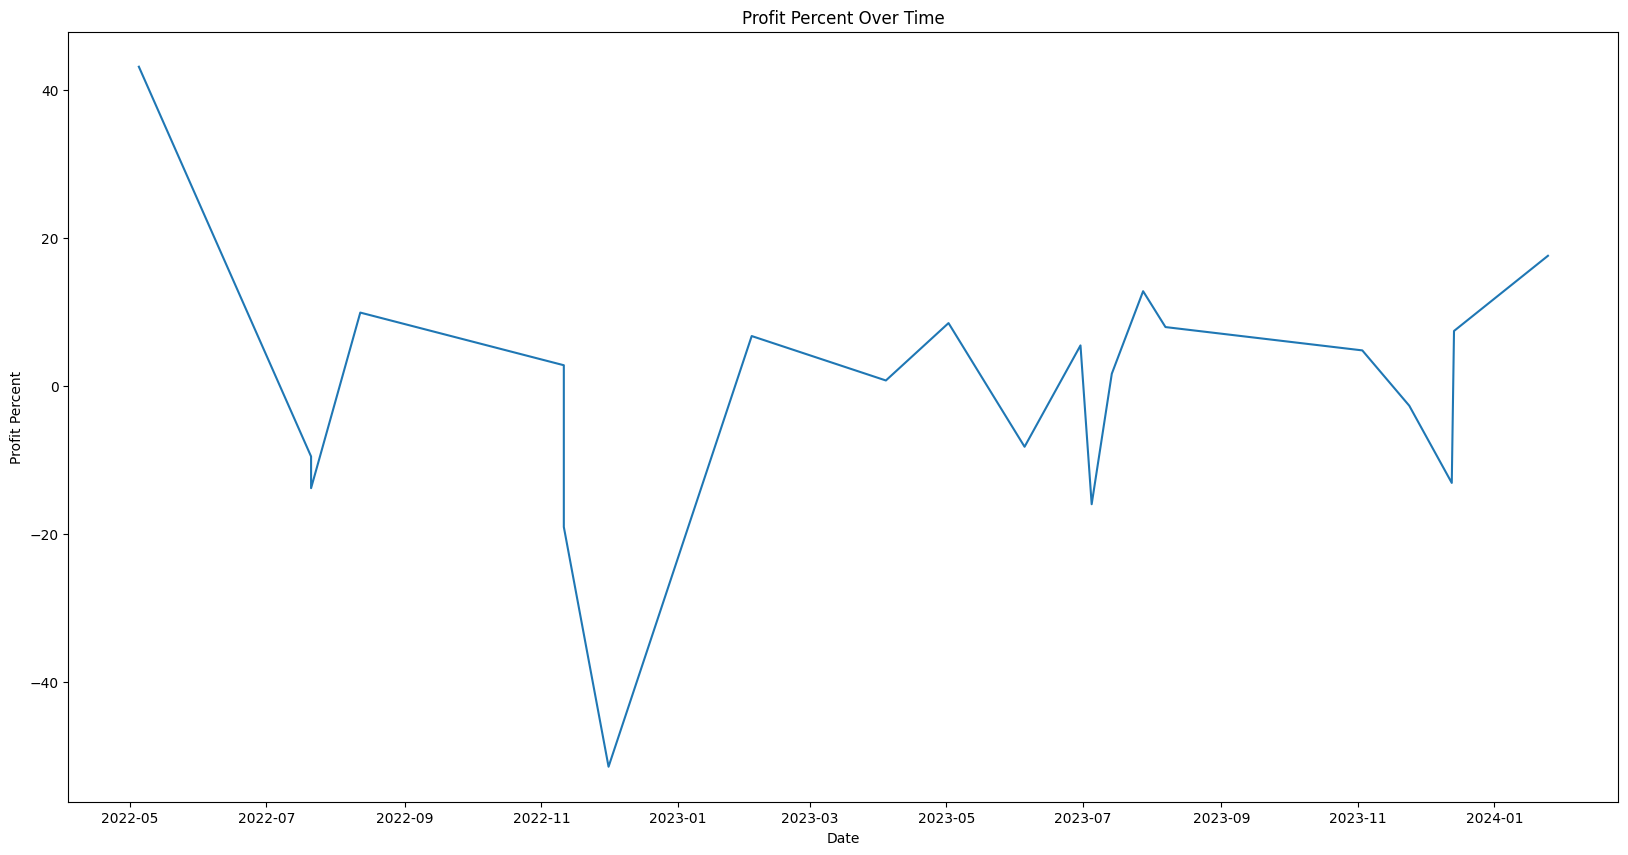

In [ ]:
positions.plot_profit_percent_time()

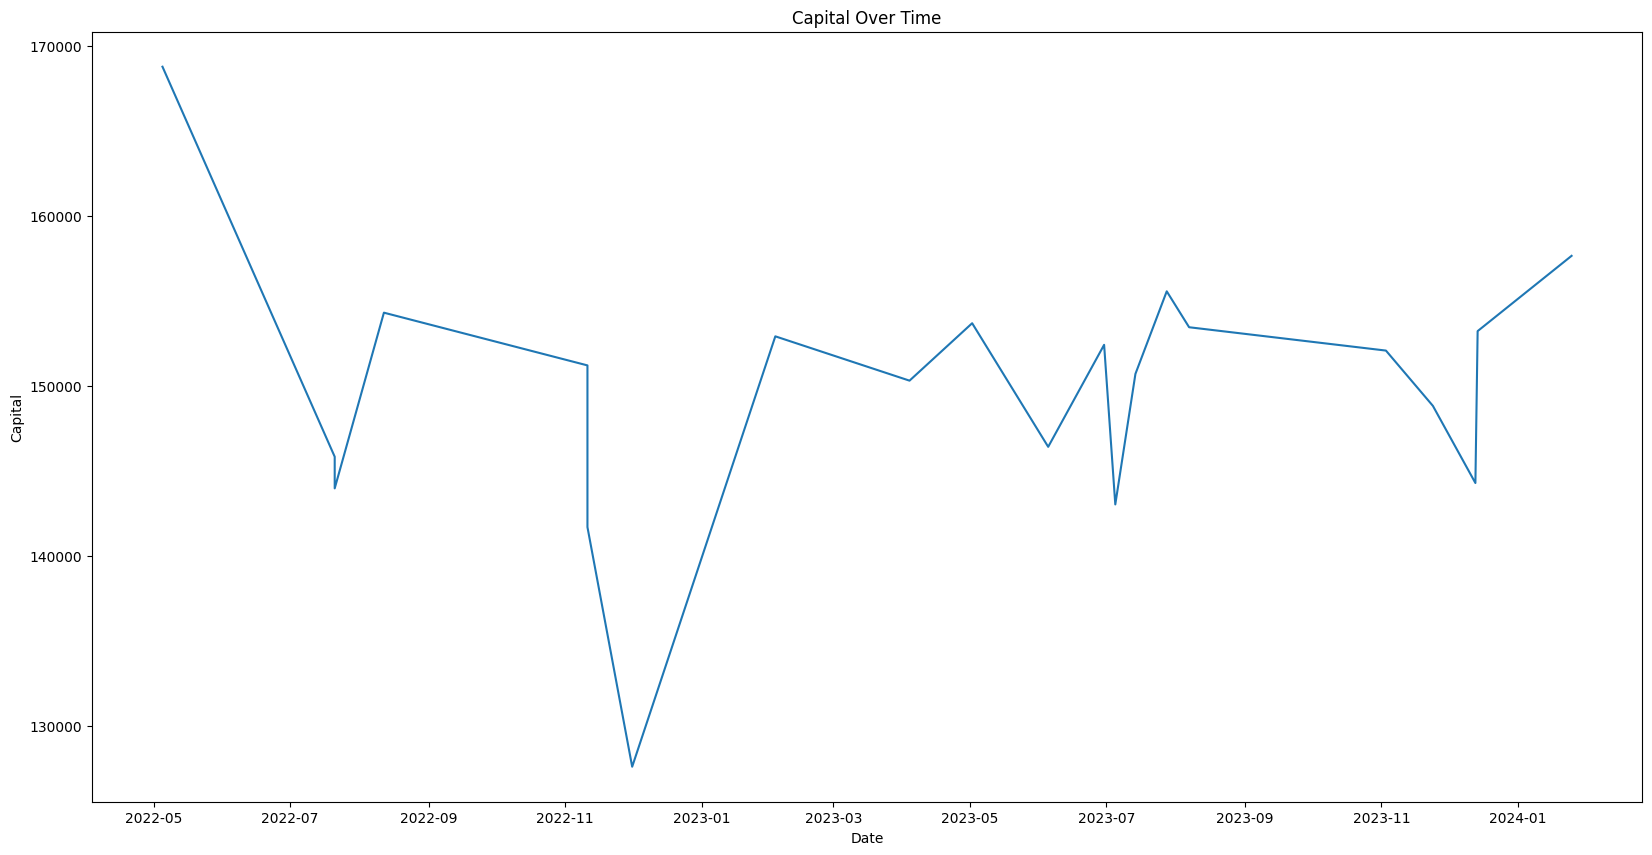

In [ ]:
positions.plot_capital_time()

In [ ]:
positions.calculate_metrics()
positions.get_metrics()

{'Sharpe Ratio': -0.01030712096649923,
 'Profit Percent': -1.22,
 'Win Rate': 61.904761904761905,
 'Max Drawdown': -2.1909186658864837,
 'Sortino Ratio': -0.013036200475041032,
 'Profit Factor': 0.9714679902408618,
 'Expectancy': -2926.318269230771,
 'R Squared': 0.02578939030487319}